## Convolutional Neural Networks (CNN)
### Image classification
#### source:  Deep learning with Pytorch book 
Ricardo Flores, www.rflores.cl

In [1]:
from torchvision import datasets
from torchvision import transforms 
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
import datetime

In [2]:
# Loading CIFAR10 dataset
data_path = './data/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)


Files already downloaded and verified
Files already downloaded and verified


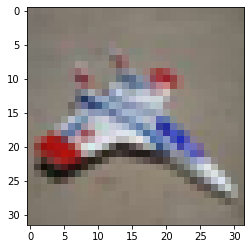

In [3]:
# Plot one image
img, label = cifar10[30]
plt.imshow(img)
plt.show()

In [4]:
# Transform data to pytorch tensor, and normalization
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


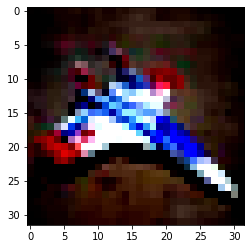

In [5]:
# Plot transformed image
img_t, _ = cifar10[30]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [6]:
# Select birds and airplanes
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [7]:
# Model 
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [8]:
# Training function 
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('Epoch {}, Training loss {}'.format(epoch,
            loss_train / len(train_loader)))
            

In [9]:
# Dataloader
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [10]:
# Run, traning
model = CNN()                                      # call our cnn class
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) # Stochastic gradient descent
loss_fn = nn.CrossEntropyLoss()                    # Loss function

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

# Epoch 1, Training loss 0.589
# ...
# Epoch 100, Training loss 0.165

Epoch 1, Training loss 0.5893849747575772
Epoch 10, Training loss 0.34461457628733033
Epoch 20, Training loss 0.30403817838923947
Epoch 30, Training loss 0.2821647920141554
Epoch 40, Training loss 0.2620022267957402
Epoch 50, Training loss 0.24425449791797407
Epoch 60, Training loss 0.2264094815892019
Epoch 70, Training loss 0.20756896599462837
Epoch 80, Training loss 0.19096853054917542
Epoch 90, Training loss 0.17738104255715753
Epoch 100, Training loss 0.16451394638627959


In [11]:
# Testing metric
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                            shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                            shuffle=False)
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model, train_loader, val_loader)

# Accuracy train: 0.93
# Accuracy val: 0.89

Accuracy train: 0.93
Accuracy val: 0.89
